In [2]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

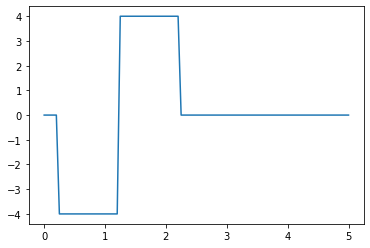

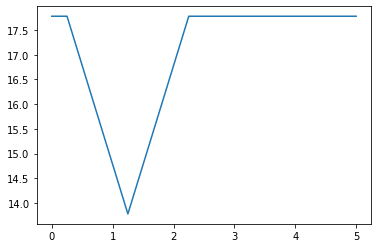

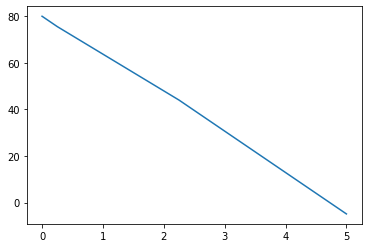

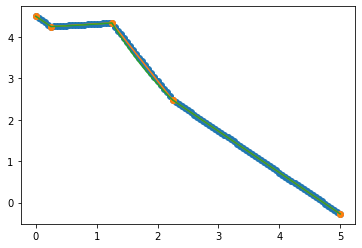

In [3]:
# this function will be a part of 02_fit_model.py
T_dur = 5.0
t = np.linspace(0, T_dur, 101)

acceleration_timings = np.array([0., 0.25, 1.25, 2.25] + [T_dur])

d_0 = 80
tta_0 = 4.5
v_0 = d_0/tta_0
a_condition = np.array([0., -4., 4., 0., 0.])
v_condition = np.concatenate([[v_0], v_0+np.cumsum(np.diff(acceleration_timings)*a_condition[:-1])])
d_condition = np.concatenate([[d_0], d_0-np.cumsum(np.diff(acceleration_timings)*(v_condition[1:]+v_condition[:-1])/2)])
tta_condition = d_condition/v_condition

# acceleration is piecewise-constant
f_a = interpolate.interp1d(acceleration_timings, a_condition, kind=0, fill_value="extrapolate", bounds_error=False)
# under piecewise-constant acceleration, v is piecewise-linear
f_v = interpolate.interp1d(acceleration_timings, v_condition, kind=1, fill_value=(v_0, v_0), bounds_error=False)
f_tta = interpolate.interp1d(acceleration_timings, tta_condition, kind=1, fill_value="extrapolate")
# under piecewise-linear v, d is piecewise-quadratic, but piecewise-linear approximation is very close
f_d = interpolate.interp1d(acceleration_timings, d_condition, kind=1, fill_value="extrapolate")

a_t = f_a(t)
v_t = f_v(t)
d_t = f_d(t)
tta_t = f_tta(t)

plt.plot(t, a_t)
plt.figure()
plt.plot(t, v_t)
plt.figure()
plt.plot(t, d_t)
plt.figure()
plt.plot(t, tta_t, marker="o")
plt.plot(acceleration_timings, tta_condition, marker="o")
plt.plot(t, d_t/v_t)

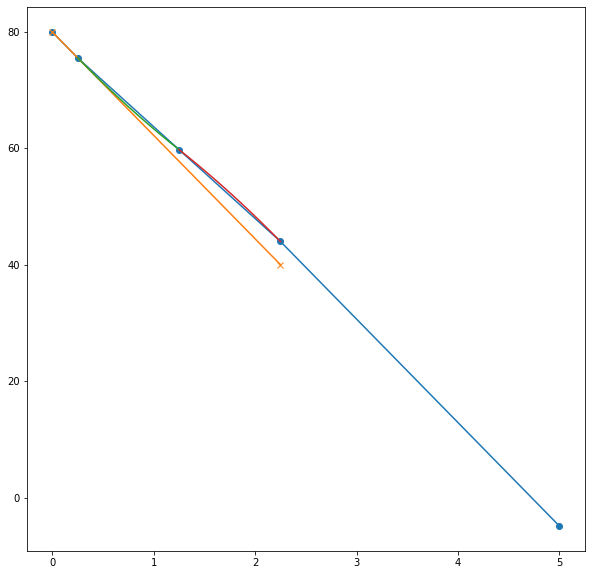

In [4]:
plt.figure(figsize=(10,10))
plt.plot(acceleration_timings, d_condition, marker="o")
plt.plot([0, 2.25], [80, 80-2.25*17.77], marker="x")
t_1 = np.linspace(0.25, 1.25, 11)
d_1 = d_condition[1] - v_condition[1]*(t_1-t_1[0]) - a_condition[1]*(t_1-t_1[0])**2/2
t_2 = np.linspace(1.25, 2.25, 11)
d_2 = d_condition[2] - v_condition[2]*(t_2-t_2[0]) - a_condition[2]*(t_2-t_2[0])**2/2
plt.plot(t_1, d_1)
plt.plot(t_2, d_2)

In [6]:
T_dur = 5.0
breakpoints = np.array([0., 0.25, 1.25, 2.25] + [T_dur])

def get_state_interp_f(tta_0, d_0, a_condition):
    v_0 = d_0/tta_0
    a_values = np.concatenate([a_condition, [0.]])
    v_values = np.concatenate([[v_0], v_0+np.cumsum(np.diff(breakpoints)*a_values[:-1])])
    d_values = np.concatenate([[d_0], d_0-np.cumsum(np.diff(breakpoints)*(v_values[1:]+v_values[:-1])/2)])
    tta_values = d_values/v_values

    # acceleration is piecewise-constant
    f_a = interpolate.interp1d(breakpoints, a_values, kind=0)
    # under piecewise-constant acceleration, tta is piecewise-linear
    # f_v = interpolate.interp1d(acceleration_timings, v_condition, kind=1, fill_value=(v_0, v_0), bounds_error=False)
    f_tta = interpolate.interp1d(breakpoints, tta_values, kind=1)
    # under piecewise-linear v, d is piecewise-quadratic, but piecewise-linear approximation is very close
    f_d = interpolate.interp1d(breakpoints, d_values, kind=1)

    return f_tta, f_d, f_a

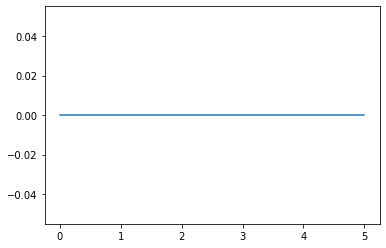

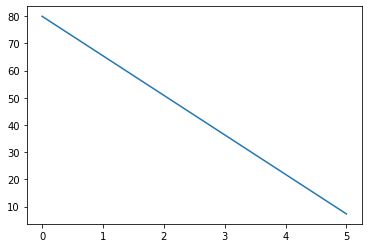

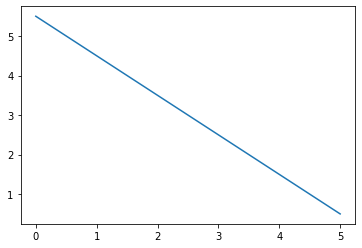

In [10]:
f_tta, f_d, f_a = get_state_interp_f(5.5, 80, [0, 0, 0, 0])

t = np.linspace(0, T_dur, 101)
tta_t = f_tta(t)
d_t = f_d(t)
a_t = f_a(t)

plt.plot(t, a_t)
plt.figure()
plt.plot(t, d_t)
plt.figure()
plt.plot(t, tta_t)

In [15]:
interpolators = {str([tta_0, d_0, a]): get_state_interp_f(tta_0, d_0, a)
                 for tta_0 in [4.5, 5.5]
                 for d_0 in [80.]
                 for a in [[0., 0., 0., 0.], [0., 4., -4., 0.]]}

In [17]:
f_tta, f_d, f_a = interpolators[str([4.5, 80., [0., 4., -4., 0.]])]

In [111]:
rt_mean = exp_measures.groupby(["decision", "tta_0", "condition"]).RT.mean().reset_index()

rt_mean_go = rt_mean[rt_mean.decision=="Go"]
rt_mean_stay = rt_mean[rt_mean.decision=="Stay"]

In [112]:
rt_within_mean = exp_measures.groupby(["decision", "subj_id", "tta_0", "condition"]).RT.mean().reset_index().groupby(["decision", "tta_0", "condition"]).RT.mean().reset_index()

rt_within_mean_go = rt_within_mean[rt_within_mean.decision=="Go"]
rt_within_mean_stay = rt_within_mean[rt_within_mean.decision=="Stay"]

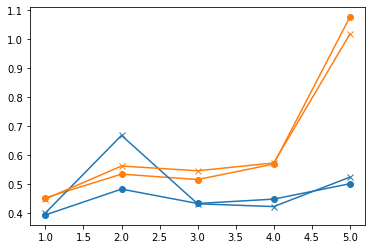

In [113]:
plt.plot(range(1,6), rt_mean_go[rt_mean_go.tta_0==4.5].RT, color="C0", marker="o")
plt.plot(range(1,6), rt_mean_go[rt_mean_go.tta_0==5.5].RT, color="C1", marker="o")

plt.plot(range(1,6), rt_within_mean_go[rt_within_mean_go.tta_0==4.5].RT, color="C0", marker="x")
plt.plot(range(1,6), rt_within_mean_go[rt_within_mean_go.tta_0==5.5].RT, color="C1", marker="x")

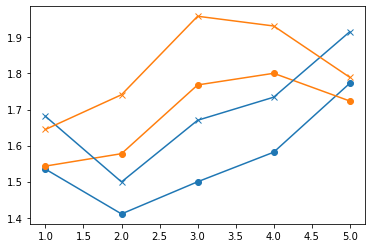

In [114]:
plt.plot(range(1,6), rt_mean_stay[rt_mean_stay.tta_0==4.5].RT, color="C0", marker="o")
plt.plot(range(1,6), rt_mean_stay[rt_mean_stay.tta_0==5.5].RT, color="C1", marker="o")

plt.plot(range(1,6), rt_within_mean_stay[rt_within_mean_stay.tta_0==4.5].RT, color="C0", marker="x")
plt.plot(range(1,6), rt_within_mean_stay[rt_within_mean_stay.tta_0==5.5].RT, color="C1", marker="x")

Using custom contrast to linearize the condition doesn't seem right - probably oversimplifies the model?

In [118]:
model_is_go_decision = pymer4.models.Lmer("is_go_decision ~ tta_0*condition_coded + (1 | subj_id) ", data=exp_measures, family="binomial")
model_is_go_decision_fit = model_is_go_decision.fit()
print(model_is_go_decision.coefs)

D:\source\cognitive-av\venv\lib\site-packages\rpy2\robjects\pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


Formula: is_go_decision~tta_0*condition_coded+(1|subj_id)

Family: binomial	 Inference: parametric

Number of observations: 3800	 Groups: {'subj_id': 19.0}

Log-likelihood: -1544.789 	 AIC: 3099.579

Random effects:

                Name    Var    Std
subj_id  (Intercept)  4.339  2.083

No random effect correlations specified

Fixed effects:

                       Estimate     2.5_ci   97.5_ci        SE        OR  \
(Intercept)           -9.196743 -10.574589 -7.818896  0.702996  0.000101   
tta_0                  1.833420   1.632607  2.034233  0.102458  6.255242   
condition_coded       -0.821978  -1.473193 -0.170763  0.332259  0.439561   
tta_0:condition_coded  0.266835   0.136247  0.397423  0.066628  1.305825   

                       OR_2.5_ci  OR_97.5_ci      Prob  Prob_2.5_ci  \
(Intercept)             0.000026    0.000402  0.000101     0.000026   
tta_0                   5.117196    7.646385  0.862169     0.836526   
condition_coded         0.229193    0.843021  0.305344     0.

### Dummy coding
probably will stick to this one: easy to get pairwise comparisons between conditions. Although this might mean the RT model becomes tricky to interpret

In [64]:
marginal_estimates, comparisons = model_is_go_decision.post_hoc(marginal_vars="condition")
# "Cell" means of the ANOVA
print(marginal_estimates)

P-values adjusted by tukey method for family of 10 estimates
            condition  Estimate  2.5_ci  97.5_ci     SE   DF
0      Constant speed    -0.243  -1.200    0.714  0.488  inf
1   Long acceleration    -1.011  -1.969   -0.053  0.489  inf
2  Acceleration nudge    -0.356  -1.313    0.600  0.488  inf
3  Deceleration nudge     0.261  -0.696    1.218  0.488  inf
4   Long deceleration     1.234   0.275    2.193  0.489  inf


In [71]:
print(comparisons)

                                  Contrast  Estimate  2.5_ci  97.5_ci     SE  \
0       Constant speed - Long acceleration     0.768   0.372    1.164  0.145   
1      Constant speed - Acceleration nudge     0.113  -0.277    0.504  0.143   
2      Constant speed - Deceleration nudge    -0.504  -0.896   -0.112  0.144   
3       Constant speed - Long deceleration    -1.477  -1.886   -1.068  0.150   
4   Long acceleration - Acceleration nudge    -0.655  -1.050   -0.259  0.145   
5   Long acceleration - Deceleration nudge    -1.272  -1.674   -0.870  0.147   
6    Long acceleration - Long deceleration    -2.245  -2.671   -1.819  0.156   
7  Acceleration nudge - Deceleration nudge    -0.617  -1.010   -0.224  0.144   
8   Acceleration nudge - Long deceleration    -1.590  -2.001   -1.180  0.151   
9   Deceleration nudge - Long deceleration    -0.973  -1.376   -0.570  0.148   

    DF  Z-stat  P-val  Sig  
0  inf   5.287  0.000  ***  
1  inf   0.791  0.933       
2  inf  -3.508  0.004   **  
3  

In [ ]:

model_RT = pymer4.models.Lmer("RT ~ decision + tta_0 + condition_coded + tta_0:decision + condition_coded:decision + (decision + tta_0 + condition_coded| subj_id) ", data=exp_measures, family="gaussian")
model_RT_fit = model_RT.fit()

df = model_RT.coefs.loc[:, ["Estimate", "2.5_ci", "97.5_ci", "T-stat", "P-val", "Sig"]]

print(df)